In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('smart_logistics_dataset.csv')

# Data Cleaning
# Handle missing values
# df.fillna(method='ffill', inplace=True)
df.ffill(inplace=True)

# Feature Engineering
# Create new features if necessary
df['Traffic_Impact'] = df['Traffic_Status'].map({'Clear': 0, 'Heavy': 1, 'Detour': 2})
df['Weather_Impact'] = df['Logistics_Delay_Reason'].apply(lambda x: 1 if x == 'Weather' else 0)

# Normalization & Scaling
scaler = StandardScaler()
numerical_features = ['Inventory_Level', 'Temperature', 'Humidity', 'Waiting_Time', 'User_Transaction_Amount', 'User_Purchase_Frequency', 'Asset_Utilization', 'Demand_Forecast']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split the data into features and target
X = df.drop(['Logistics_Delay', 'Timestamp', 'Asset_ID', 'Shipment_Status', 'Logistics_Delay_Reason'], axis=1)
y = df['Logistics_Delay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

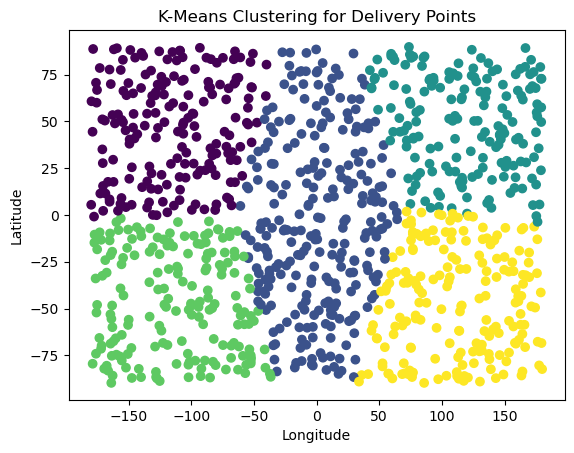

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Convert categorical columns to numerical values
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# Ensure there are no missing values
X.fillna(X.mean(), inplace=True)

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters (Example using latitude and longitude)
import matplotlib.pyplot as plt

plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering for Delivery Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [3]:
print(df.dtypes)

Timestamp                   object
Asset_ID                    object
Latitude                   float64
Longitude                  float64
Inventory_Level            float64
Shipment_Status             object
Temperature                float64
Humidity                   float64
Traffic_Status              object
Waiting_Time               float64
User_Transaction_Amount    float64
User_Purchase_Frequency    float64
Logistics_Delay_Reason      object
Asset_Utilization          float64
Demand_Forecast            float64
Logistics_Delay              int64
Traffic_Impact               int64
Weather_Impact               int64
Cluster                      int32
dtype: object


In [4]:
print(df.select_dtypes(include=['object']).head())

             Timestamp  Asset_ID Shipment_Status Traffic_Status  \
0  2024-03-20 00:11:14   Truck_7         Delayed         Detour   
1  2024-10-30 07:53:51   Truck_6      In Transit          Heavy   
2  2024-07-29 18:42:48  Truck_10      In Transit         Detour   
3  2024-10-28 00:50:54   Truck_9       Delivered          Heavy   
4  2024-09-27 15:52:58   Truck_7         Delayed          Clear   

  Logistics_Delay_Reason  
0                    NaN  
1                Weather  
2                Weather  
3                Traffic  
4                Traffic  


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.164597


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train['Traffic_Status'] = encoder.fit_transform(X_train['Traffic_Status'])
X_test['Traffic_Status'] = encoder.transform(X_test['Traffic_Status'])

In [6]:
print(X_train.dtypes)
print(y_train.dtypes)

Latitude                   float64
Longitude                  float64
Inventory_Level            float64
Temperature                float64
Humidity                   float64
Traffic_Status              object
Waiting_Time               float64
User_Transaction_Amount    float64
User_Purchase_Frequency    float64
Asset_Utilization          float64
Demand_Forecast            float64
Traffic_Impact               int64
Weather_Impact               int64
dtype: object
int64


In [7]:
print(X_train.select_dtypes(include=['object']).head())  # Show first few rows of non-numeric columns

    Traffic_Status
29           Heavy
535          Heavy
695          Heavy
557         Detour
836          Heavy


In [8]:
for col in X_train.columns:
    print(f"Column: {col}, Unique Values: {X_train[col].unique()}")


Column: Latitude, Unique Values: [-6.57349e+01 -6.62696e+01  3.57913e+01 -6.85749e+01 -7.79740e+00
  4.68609e+01 -2.54692e+01 -7.35498e+01 -8.87760e+01 -6.26441e+01
  7.35750e+00 -2.77387e+01  2.39592e+01  6.78612e+01 -8.67010e+01
 -1.11333e+01 -2.78806e+01  5.92432e+01  8.70180e+01  3.75523e+01
  5.11598e+01  4.45289e+01 -9.85350e+00 -7.99146e+01 -3.04204e+01
  5.49232e+01  7.11800e-01  2.04460e+01  5.83197e+01  5.12380e+00
 -4.08724e+01  4.42477e+01 -5.99919e+01 -4.17908e+01  8.03158e+01
  5.91790e+00  5.45973e+01  5.75550e+01  6.82361e+01 -7.06858e+01
  4.23900e+01 -6.77619e+01 -4.75698e+01 -8.59619e+01 -2.95867e+01
  5.70760e+00 -7.52867e+01 -2.00696e+01  3.57136e+01 -5.55154e+01
 -4.61616e+01  4.17679e+01 -5.36993e+01  7.70206e+01 -8.51352e+01
  6.45212e+01 -4.60132e+01  1.75448e+01  1.87610e+01  7.33312e+01
 -3.05476e+01  5.59190e+01  6.08032e+01  1.75319e+01 -7.50605e+01
 -1.35350e+01  2.18816e+01 -8.45860e+00  3.81095e+01  1.40092e+01
  1.52159e+01  3.33351e+01 -4.47640e+01 -3.

In [30]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [31]:
print(X_train.dtypes)
print(y_train.dtypes)


Latitude                   float64
Longitude                  float64
Inventory_Level            float64
Temperature                float64
Humidity                   float64
Waiting_Time               float64
User_Transaction_Amount    float64
User_Purchase_Frequency    float64
Asset_Utilization          float64
Demand_Forecast            float64
Traffic_Impact               int64
Weather_Impact               int64
Traffic_Status_Detour         bool
Traffic_Status_Heavy          bool
dtype: object
int64


In [32]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# X_train['Traffic_Status'] = encoder.fit_transform(X_train['Traffic_Status'])
# X_test['Traffic_Status'] = encoder.transform(X_test['Traffic_Status'])

In [33]:
print(X_train.columns)


Index(['Latitude', 'Longitude', 'Inventory_Level', 'Temperature', 'Humidity',
       'Waiting_Time', 'User_Transaction_Amount', 'User_Purchase_Frequency',
       'Asset_Utilization', 'Demand_Forecast', 'Traffic_Impact',
       'Weather_Impact', 'Traffic_Status_Detour', 'Traffic_Status_Heavy'],
      dtype='object')


In [34]:
# X_train = pd.get_dummies(X_train, drop_first=True)
# X_test = pd.get_dummies(X_test, drop_first=True)


In [35]:
# print(y_train.unique())


In [ ]:
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


In [37]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Reinforcement Learning (Deep Q-Learning) - Simplified Example
# This is a placeholder for a more complex RL implementation
class DeepQLearning:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.model = self._build_model()

    def _build_model(self):
        # Define the neural network model
        from keras.models import Sequential
        from keras.layers import Dense
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer='adam')
        return model

    def train(self, states, actions, rewards, next_states, done):
        # Train the model
        target = rewards + 0.95 * np.amax(self.model.predict(next_states), axis=1) * (1 - done)
        target_f = self.model.predict(states)
        target_f[0][actions] = target
        self.model.fit(states, target_f, epochs=1, verbose=0)

# Example usage
state_size = X_train.shape[1]
action_size = 5  # Example: 5 possible actions
dql = DeepQLearning(state_size, action_size)

In [39]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [40]:
import tensorflow as tf
print(tf.keras.__version__)


3.9.0


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

class DeepQLearning:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.model = self._build_model()

    def _build_model(self):
        # Define the neural network model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer='adam')
        return model

    def train(self, states, actions, rewards, next_states, done):
        # Train the model
        target = rewards + 0.95 * np.amax(self.model.predict(next_states), axis=1) * (1 - done)
        target_f = self.model.predict(states)
        target_f[0][actions] = target
        self.model.fit(states, target_f, epochs=1, verbose=0)

# Example usage
state_size = X_train.shape[1]
action_size = 5  # Example: 5 possible actions
dql = DeepQLearning(state_size, action_size)

In [43]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

class DeepQLearning:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.model = self._build_model()

    def _build_model(self):
        # Define the neural network model
        # model = Sequential()
        # model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        # model.add(Dense(24, activation='relu'))
        # model.add(Dense(self.action_size, activation='linear'))
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(10,)))  # ✅ No warning
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='mse', optimizer='adam')
        return model

    def train(self, states, actions, rewards, next_states, done):
        # Train the model
        target = rewards + 0.95 * np.amax(self.model.predict(next_states), axis=1) * (1 - done)
        target_f = self.model.predict(states)
        target_f[0][actions] = target
        self.model.fit(states, target_f, epochs=1, verbose=0)

# Example usage
state_size = X_train.shape[1]
action_size = 5  # Example: 5 possible actions
dql = DeepQLearning(state_size, action_size)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(10,)),  # ✅ Define input shape separately
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [46]:
from scipy.optimize import minimize

# Genetic Algorithm (Simplified Example)
def objective_function(x):
    return np.sum(x**2)  # Example objective function

# Constraint example
def constraint(x):
    return x[0] + x[1] - 1

# Initial guess
x0 = np.array([1, 2])

# Optimize
solution = minimize(objective_function, x0, constraints={'type': 'eq', 'fun': constraint})
print(f'Optimized Solution: {solution.x}')

Optimized Solution: [0.5 0.5]


In [47]:
print(df.columns)


Index(['Timestamp', 'Asset_ID', 'Latitude', 'Longitude', 'Inventory_Level',
       'Shipment_Status', 'Temperature', 'Humidity', 'Traffic_Status',
       'Waiting_Time', 'User_Transaction_Amount', 'User_Purchase_Frequency',
       'Logistics_Delay_Reason', 'Asset_Utilization', 'Demand_Forecast',
       'Logistics_Delay', 'Traffic_Impact', 'Weather_Impact', 'Cluster'],
      dtype='object')


In [48]:
# print(df['target_column_name'].describe())  # Replace with actual column name

In [49]:
# IoT & Sensor Data for Fleet Management (Example)
class FleetManagement:
    def __init__(self):
        self.sensor_data = {}

    def update_sensor_data(self, vehicle_id, fuel_level, engine_health):
        self.sensor_data[vehicle_id] = {'fuel_level': fuel_level, 'engine_health': engine_health}

    def detect_anomalies(self):
        # Example anomaly detection
        for vehicle_id, data in self.sensor_data.items():
            if data['fuel_level'] < 10:
                print(f'Alert: Vehicle {vehicle_id} has low fuel!')
            if data['engine_health'] < 50:
                print(f'Alert: Vehicle {vehicle_id} has engine issues!')

# Example usage
fleet = FleetManagement()
fleet.update_sensor_data('Truck_1', 15, 75)
fleet.update_sensor_data('Truck_2', 8, 45)
fleet.detect_anomalies()

Alert: Vehicle Truck_2 has low fuel!
Alert: Vehicle Truck_2 has engine issues!


In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
# The .plt file is a space-separated file with specific columns
column_names = ['latitude', 'longitude', 'reserved', 'altitude', 'date', 'time']
data = pd.read_csv('20090415134400.plt', skiprows=6, header=None, names=column_names, delimiter=',')

# Display the first few rows of the dataset
print(data.head())

# Convert date and time to a single timestamp column
data['timestamp'] = pd.to_datetime(data['date'] + ' ' + data['time'])

# Drop unnecessary columns
data.drop(columns=['reserved', 'date', 'time'], inplace=True)

# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)

# Feature engineering (if needed)
# For example, calculate distance between consecutive points
data['distance'] = np.sqrt(
    (data['latitude'].diff()) ** 2) + (data['longitude'].diff() ** 2)
data['distance'].fillna(0, inplace=True)

# Normalize and scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['latitude', 'longitude', 'altitude', 'distance']])

# Create a DataFrame from the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['latitude', 'longitude', 'altitude', 'distance'])

# Add the timestamp back to the scaled DataFrame
# Ensure the timestamp column is unique by adding a small increment to duplicates
scaled_df['timestamp'] = data['timestamp']
scaled_df['timestamp'] = scaled_df.groupby('timestamp').cumcount().astype(str) + '_' + scaled_df['timestamp'].astype(str)

# Display the preprocessed data
print(scaled_df.head())

# Feature selection (assuming relevant features are already selected)
features = scaled_df[['latitude', 'longitude', 'distance']]
target = scaled_df['altitude']  # Example target variable (altitude)

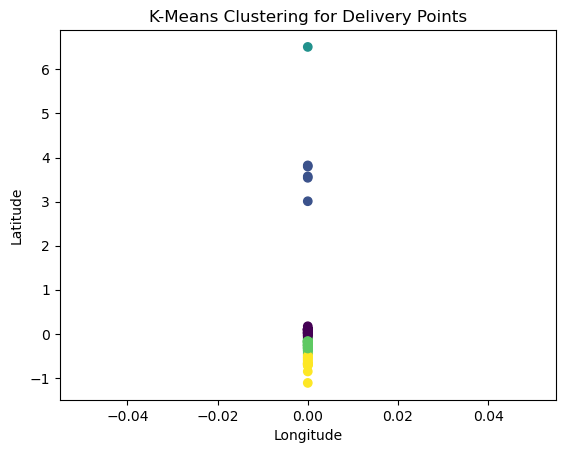

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-Means clustering on latitude and longitude
kmeans = KMeans(n_clusters=5, random_state=42)
scaled_df['cluster'] = kmeans.fit_predict(scaled_df[['latitude', 'longitude']])

# Visualize the clusters
plt.scatter(scaled_df['longitude'], scaled_df['latitude'], c=scaled_df['cluster'], cmap='viridis')
plt.title('K-Means Clustering for Delivery Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
from notebook_setup import setup_environment, setup_notebook_styling
from IPython.display import HTML

# Install packages properly using %pip
setup_environment()

# Apply custom styling
display(HTML(setup_notebook_styling()))

# Import the logistics system
from enhanced_logistics import EnhancedLogisticsOptimizer

# Create and display the dashboard
optimizer = EnhancedLogisticsOptimizer()
optimizer.setup_ui()

Installing required packages...
